Using all features
Random Forest Evaluation Metrics:

Log-Transformed Random Forest Evaluation Metrics: 🏆
R²   (R-squared):              0.2955 >> closer to 1.0 = better
MSE  (Mean Squared Error):     16478499798836.47
MAPE (Mean Absolute % Error):  39.50% >> lower is better

Gradient Boosting Evaluation Metrics:
R²   (R-squared):              -0.3453 closer to 1.0 = better
MSE  (Mean Squared Error):     31465912161608.78
MAPE (Mean Absolute % Error):  50.04%

Polynomial Regression Evaluation Metrics:
R²   (R-squared):              -357290.7747 closer to 1.0 = better
MSE  (Mean Squared Error):     8357134698325957632.00
MAPE (Mean Absolute % Error):  5704.72%

Linear Regression Evaluation Metrics:
R²   (R-squared):              -0.1660 closer to 1.0 = better
MSE  (Mean Squared Error):     27271938218871.29
MAPE (Mean Absolute % Error):  53.20%

Random Forest Evaluation Metrics:
R²   (R-squared):              -0.1512 closer to 1.0 = better
MSE  (Mean Squared Error):     26926261135373.15
MAPE (Mean Absolute % Error):  47.20%

XGBoost Evaluation Metrics:
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%

GradientBoostingRegressor

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
# Step 2: Train the model
gbr.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = gbr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # In %

# Print results
print("Gradient Boosting Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Gradient Boosting Evaluation Metrics:
R²   (R-squared):              -0.3453
MSE  (Mean Squared Error):     31465912161608.78
MAPE (Mean Absolute % Error):  50.04%


*******************************************************************************

Polynomial Regression

In [3]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Create polynomial features (degree=2 is a good start)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train Linear Regression on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict
y_pred = model.predict(X_test_poly)

# Step 4: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 5: Print results
print("Polynomial Regression Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Polynomial Regression Evaluation Metrics:
R²   (R-squared):              -357290.7747
MSE  (Mean Squared Error):     8357134698325957632.00
MAPE (Mean Absolute % Error):  5704.72%


***************************************************************************************

Linear Regression

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict
y_pred = model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print metrics
print("Linear Regression Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Linear Regression Evaluation Metrics:
R²   (R-squared):              -0.1660
MSE  (Mean Squared Error):     27271938218871.29
MAPE (Mean Absolute % Error):  53.20%


*********************************************************************************************

Random Forest model

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Step 1: Train the model
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print results
print("Random Forest Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

Random Forest Evaluation Metrics:
R²   (R-squared):              -0.1512
MSE  (Mean Squared Error):     26926261135373.15
MAPE (Mean Absolute % Error):  47.20%


Random Forest Updated Code with Log Transform on Target

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# ✅ Step 1: Apply log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# ✅ Step 2: Set up hyperparameter grid
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# ✅ Step 3: Train the model using log-transformed target
grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train_log)

best_model = grid.best_estimator_

# ✅ Step 4: Predict and reverse the log transformation
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse log1p

# ✅ Step 5: Evaluate on original scale
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# ✅ Step 6: Print results
print("Log-Transformed Random Forest Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Log-Transformed Random Forest Evaluation Metrics:
R²   (R-squared):              0.2955
MSE  (Mean Squared Error):     16478499798836.47
MAPE (Mean Absolute % Error):  39.50%


In [7]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<Axes: xlabel='Total_Returns_NextYear', ylabel='Count'>

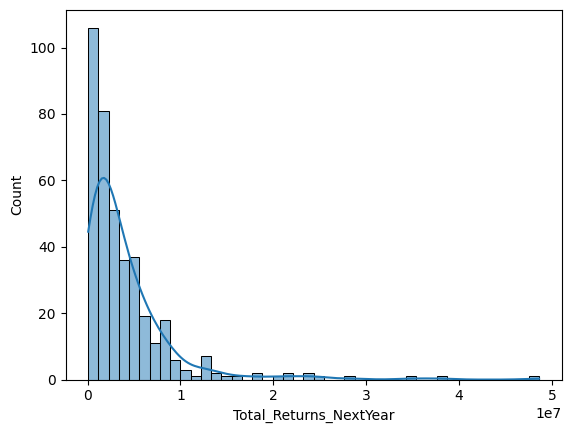

In [9]:
import seaborn as sns
sns.histplot(y_train, kde=True)


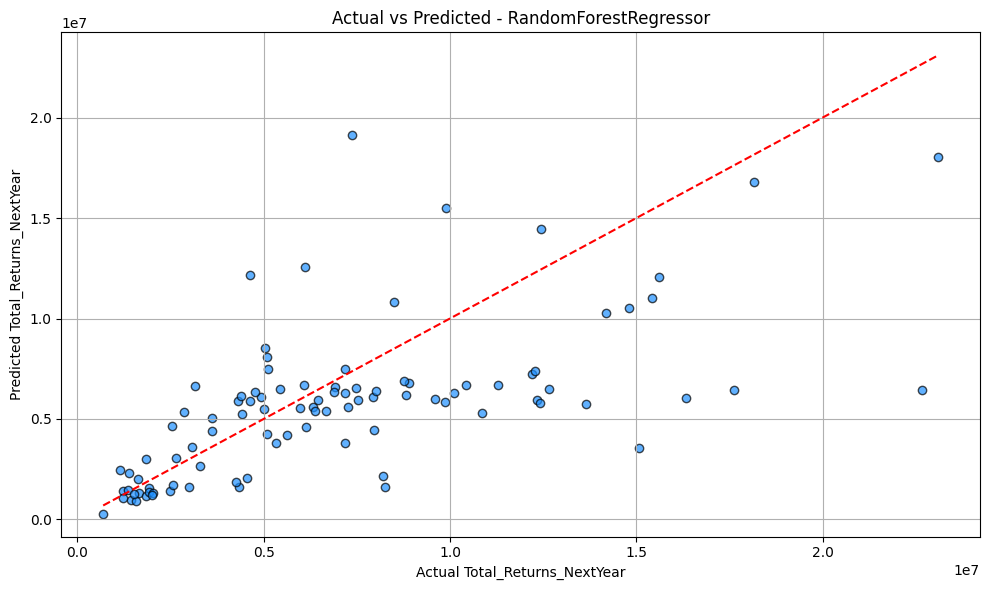

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Total_Returns_NextYear")
plt.ylabel("Predicted Total_Returns_NextYear")
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.grid(True)
plt.tight_layout()
plt.show()


************************************************************************************************************

XGBoost Regressor

In [11]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']

X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 2: Predict
y_pred = xgb_model.predict(X_test)

# Step 3: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Step 4: Print results
print("XGBoost Evaluation Metrics:")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")

XGBoost Evaluation Metrics:
R²   (R-squared):              -0.1194
MSE  (Mean Squared Error):     26183788053661.45
MAPE (Mean Absolute % Error):  43.69%
